In [97]:
import pandas as pd
import numpy as np
from numpy import nan
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
data_set = pd.read_csv("archive/CC GENERAL.csv")

In [63]:
data_set.head(5)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [64]:
data_set.drop("CUST_ID" , axis = 1 ,inplace = True)

In [65]:
data_set.isnull().any()

BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [66]:
### CREDIT_LIMIT and MINIMUM_PAYMENT has NaN values ,lets find out where and replace it is null with average


In [67]:
print(data_set['CREDIT_LIMIT'].isnull().sum())        ### total number of nulls in this column
print(data_set['MINIMUM_PAYMENTS'].isnull().sum())       ### total number of nulls in second column

1
313


In [68]:
mean1 = data_set['CREDIT_LIMIT'].mean()
mean2 = data_set['MINIMUM_PAYMENTS'].mean()

In [69]:
print(mean1)
print(mean2)

4494.449450364621
864.2065423050814


In [83]:
data_set['CREDIT_LIMIT'].fillna(value = mean1 , inplace = True)
data_set['MINIMUM_PAYMENTS'].fillna(value = mean1 , inplace = True)

In [84]:
df_array = data_set.values

In [85]:
df_array[1,:]

array([3.20246742e+03, 9.09091000e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.44294548e+03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.50000000e-01, 4.00000000e+00, 0.00000000e+00,
       7.00000000e+03, 4.10303260e+03, 1.07234022e+03, 2.22222000e-01,
       1.20000000e+01])

In [86]:
#### now normalizing data frame
##normalised_df = (df_array-df_array.min())/df_array.std()

In [87]:
##normalised_df[1 , :]  ### here the data is normalised  

In [76]:
### now performing k_means clustering

In [93]:
### calculating best numbers of clusters on WCSS (within cluster sum of squares of distance using elbow method )
wcss = []
for i in range(1,30):
    model = KMeans(n_clusters = i ,init = 'k-means++' , max_iter = 50)
    model.fit_predict(df_array)
    wcss.append(model.inertia_)

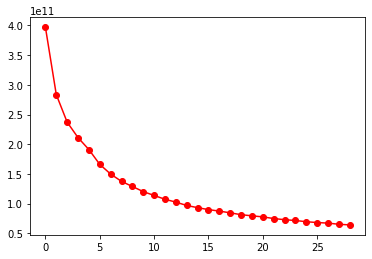

In [95]:
###now visualising wcss and i
plt.plot(wcss , 'ro-' ,label = "rr")


In [96]:
### let us take n_clusters = 8

C:\Users\shri\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


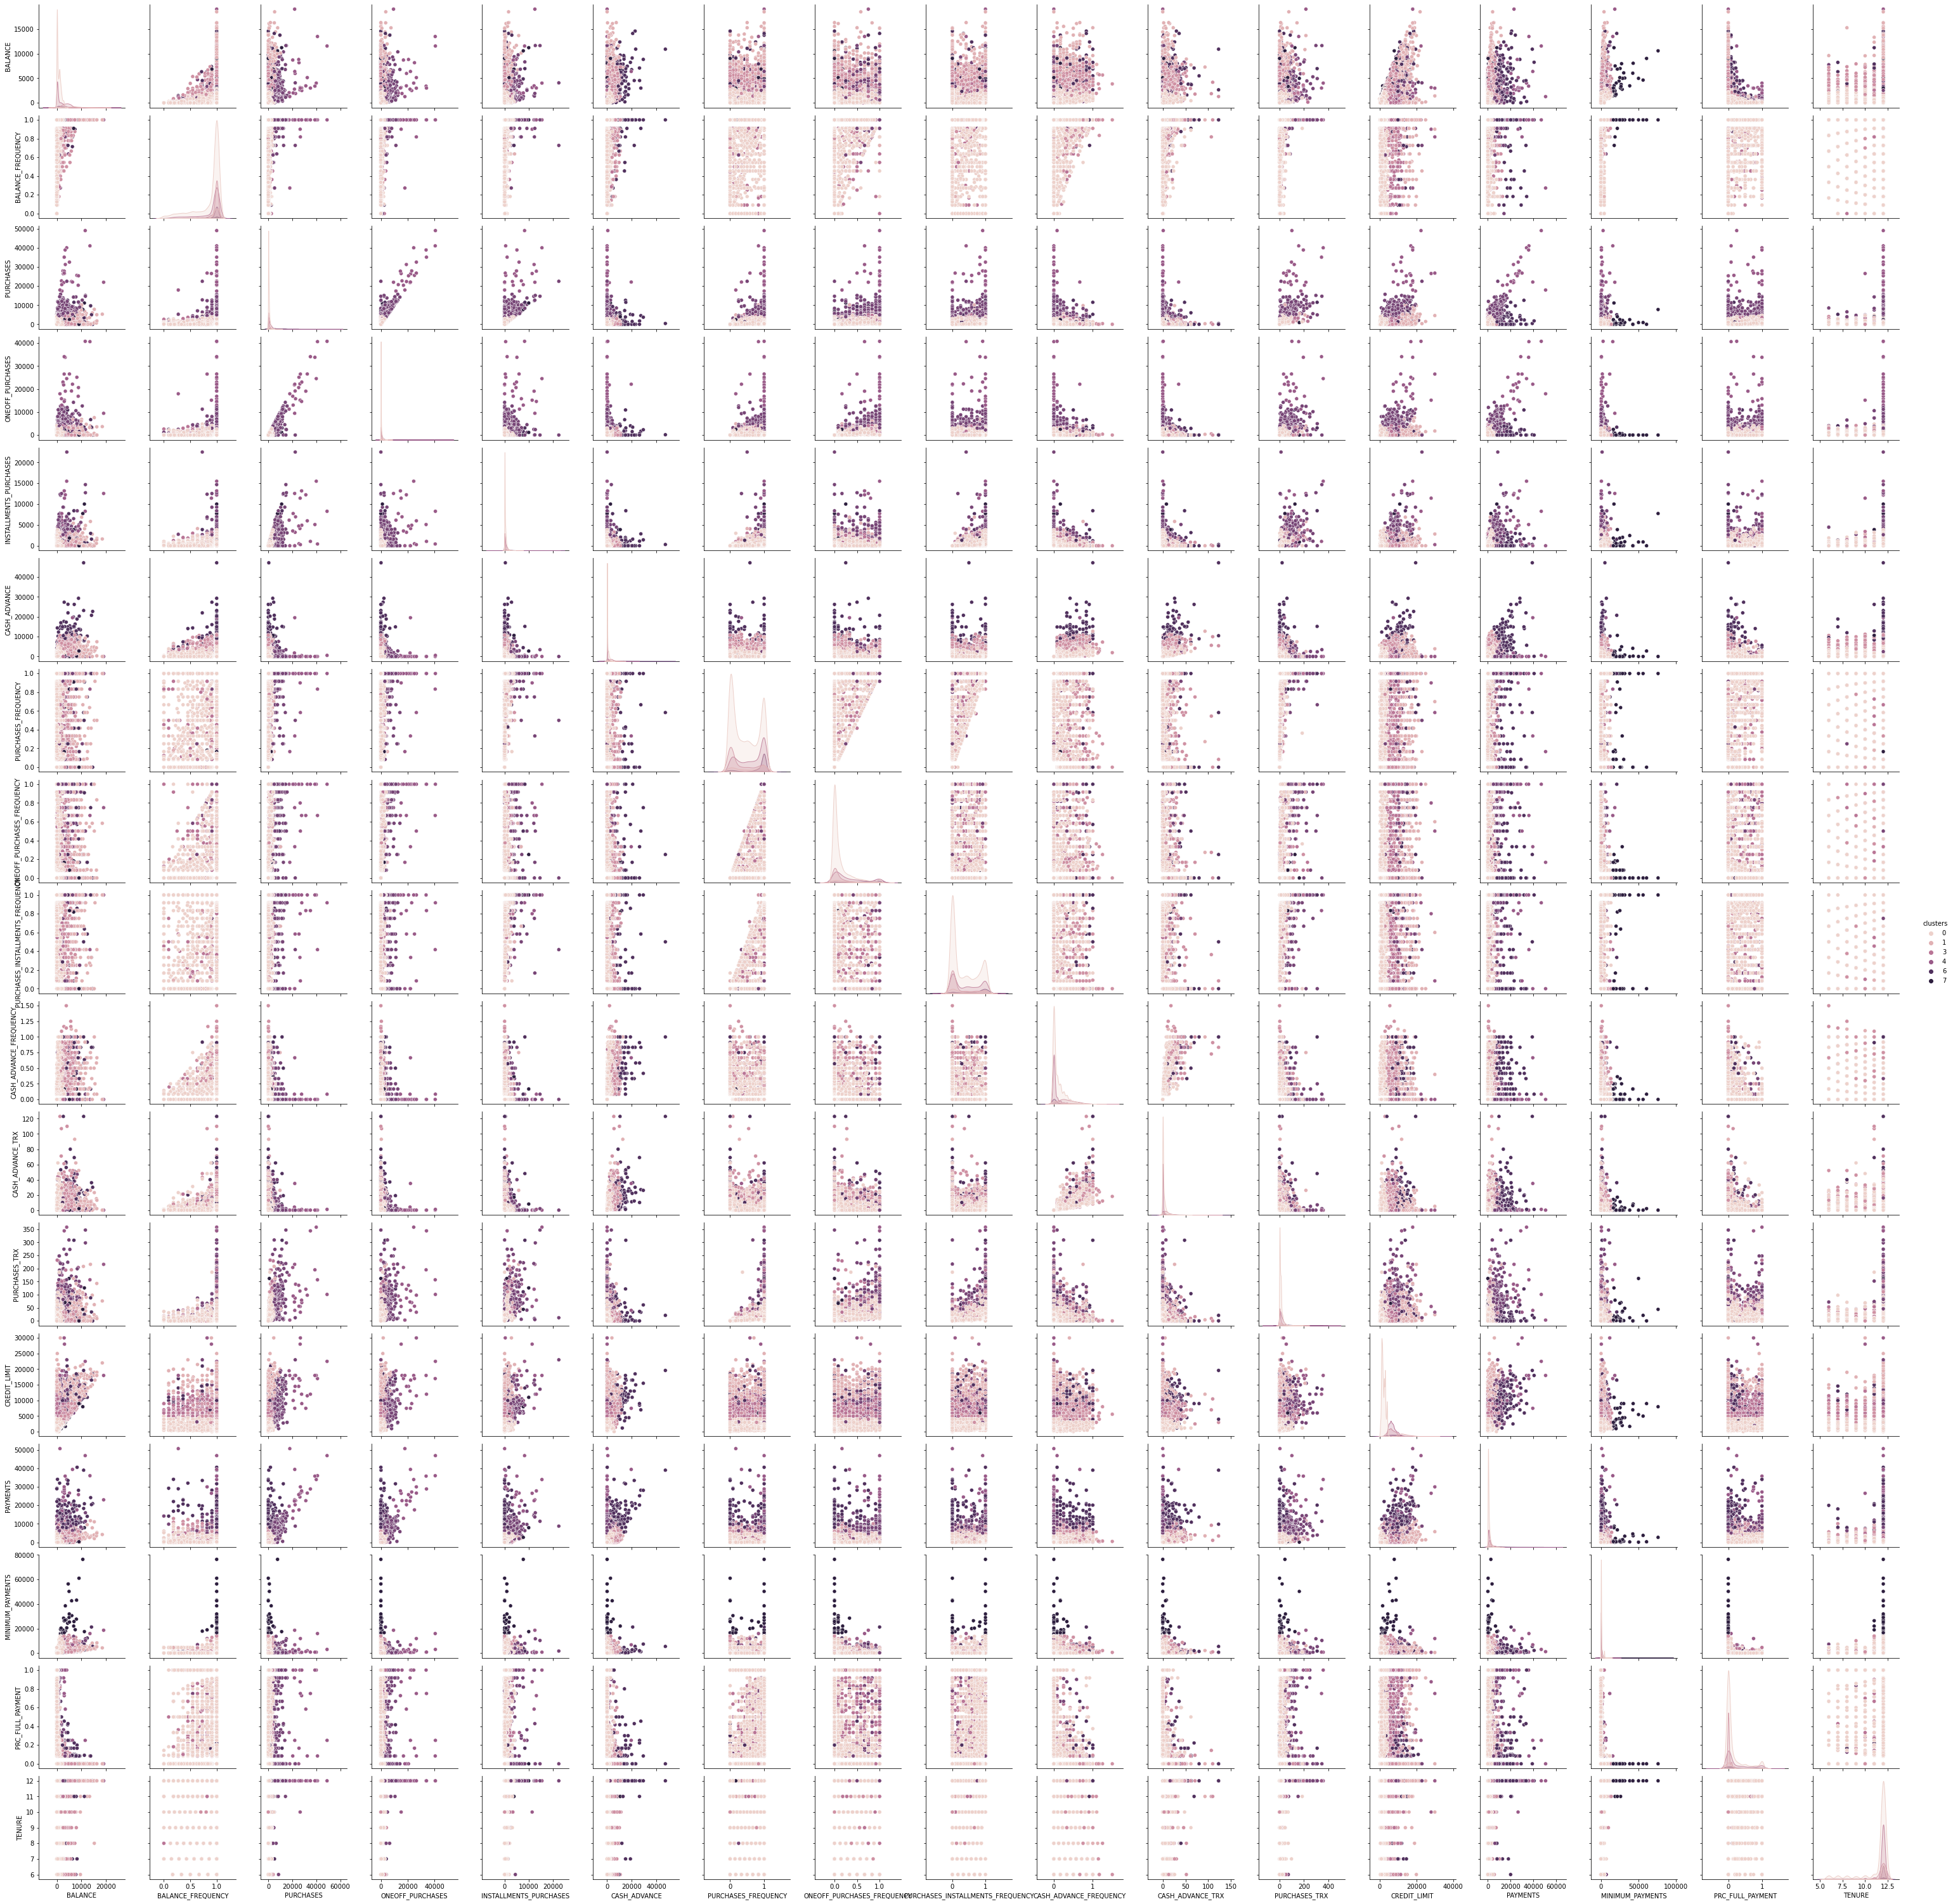

In [99]:
model = KMeans(n_clusters = 8 , max_iter = 300 , init = 'k-means++')
y_pred = model.fit_predict(df_array)      ### returns which cluster each sample belongs to

data_set['clusters'] = y_pred            ### adding a column with clusters to which a sample belongs
cols = list(data_set.columns)
sns.pairplot( data_set[cols] , hue = 'clusters')

In [108]:
### some of the plots for which the graphs are littlebit clear so plotting them once again
list1 = ['BALANCE' , 'BALANCE_FREQUENCY' , 'PURCHASES_FREQUENCY' , 'ONEOFF_PURCHASES_FREQUENCY' , 'PURCHASES_INSTALLMENTS_FREQUENCY' ,
        'CASH_ADVANCE_FREQUENCY' , 'CREDIT_LIMIT' ,'clusters']

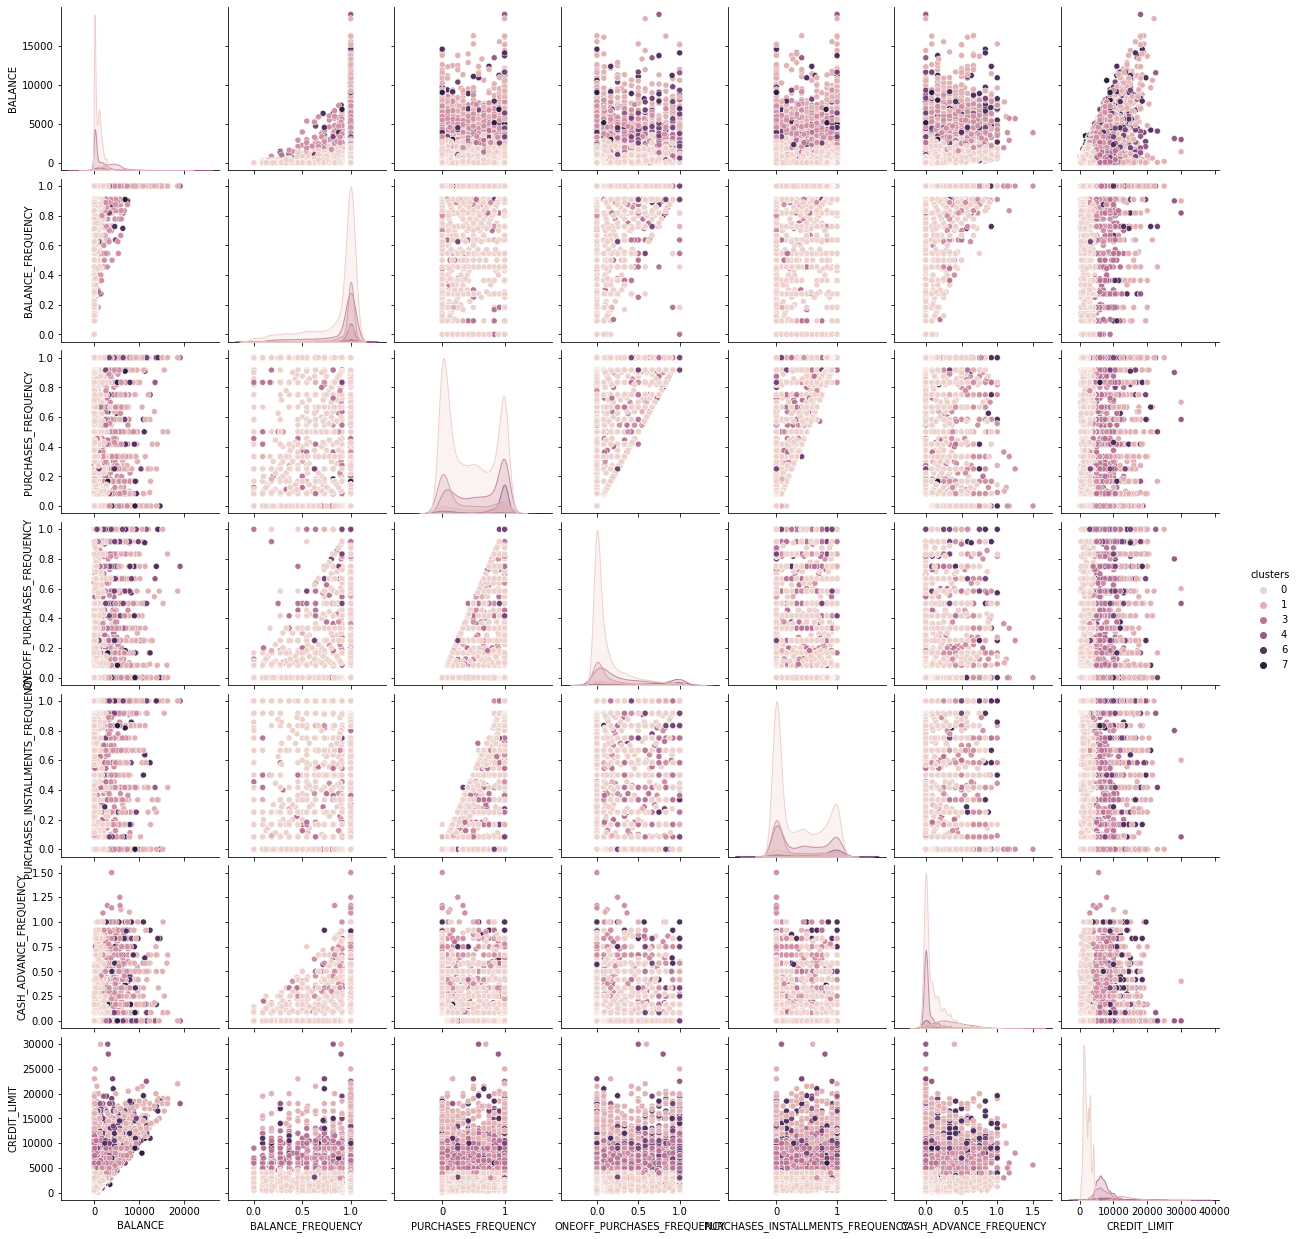

In [103]:
sns.pairplot(data_set[list1] , hue = 'clusters')

In [109]:
#### finding clusters on basis of these columns only
list1.remove('clusters')

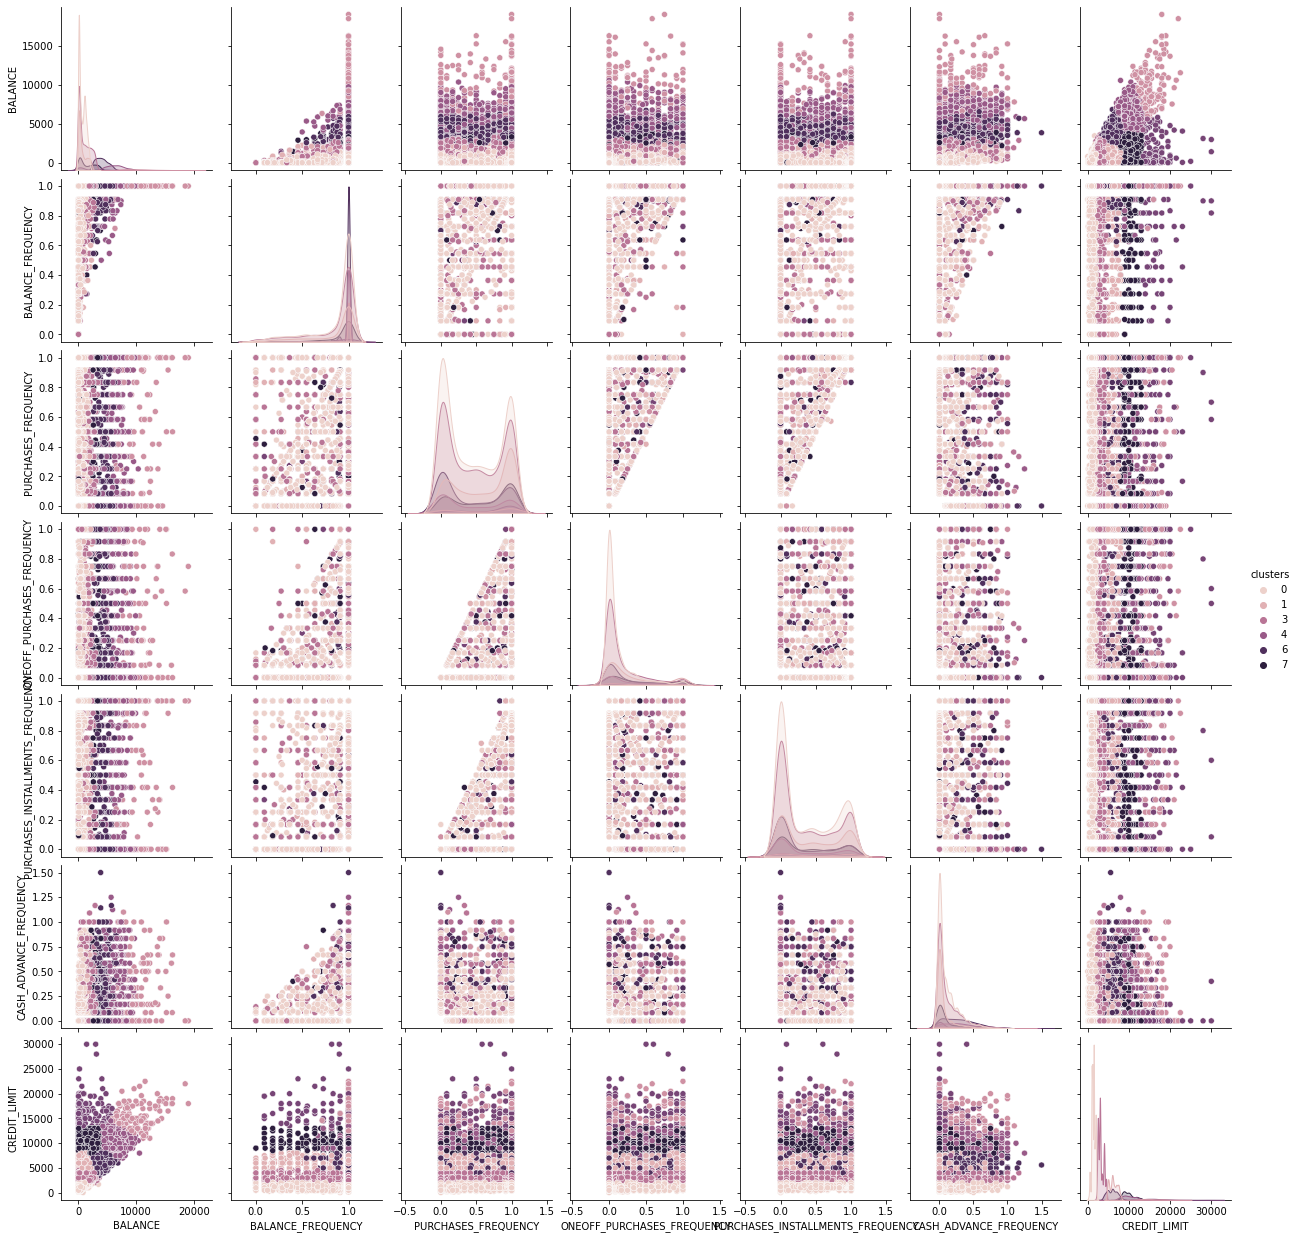

In [110]:
data_set2 = data_set[list1].values
model = KMeans(n_clusters = 8 , init = 'k-means++' , max_iter = 300)
y_pred = model.fit_predict(data_set2)

data_set['clusters'] = y_pred
list1.append('clusters')
sns.pairplot( data_set[list1] , hue = 'clusters')